In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Checking if we are using google colab or local machine and configuring 
# imports accordingly
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP
from cnp.run_experiment import run_experiment

import torch
import numpy as np
from copy import copy

# import utils
import json
from datetime import date

Running on Colab?
yes
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
if google_colab=='yes':
    config_dir = 'base_configs'
else:
    config_dir = os.path.join(BASE_DIR,'base_configs')

# checkin the parameters
# loading the base config file for this experiment
with open(os.path.join(config_dir,'greyscale_pixelregression_config.json')) as f:
    file = f.read()
    base_config = json.loads(file)
base_config

{'cnp_params': {'aggregation_kwargs': {'aggregator': None,
   'simple_aggregator_type': 'mean'},
  'dimout': 2,
  'dimr': 128,
  'dimx': 2,
  'dimy': 1,
  'dropout': 0,
  'max_contx': 80,
  'max_funcs': 100,
  'min_contx': 25,
  'min_funcs': 25,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.TwoDImageRegression',
  'init_kwargs': {'height': 28,
   'link': '~/.pytorch/MNIST_data/',
   'scale_mean': 0.5,
   'scale_std': 0.5,
   'share_train_data': 0.8,
   'width': 28},
  'num_instances_test': 100,
  'num_instances_train': 32,
  'num_instances_vali': 10},
 'experiment_params': {'lr': 0.001,
  'n_epochs': 200000,
  'seed': 1,
  'train_on_gpu': False},
 'mu_gen': 0,
 'train_kwargs': {'batch_size_test': 10,
  'batch_size_train': 32,
  'batch_size_vali': 5,
  'plot_mode': '2d_greyscale',
  'plot_progress': True,
  'plotting': True,
  'print_after': 2000}}

In [4]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    base_config['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    base_config['experiment_params']['train_on_gpu'] = False

Training on GPU!


## Simple Mean Experiment 

In [5]:
mean_exp_config = copy(base_config)

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=130, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using mean operation


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.
  0%|          | 0/200000 [00:00<?, ?it/s]

Done!
Mean training loss at epoch 0 :                         0.774
Mean Validation loss after 0 equals                     0.716



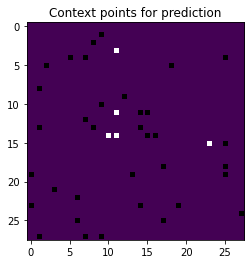

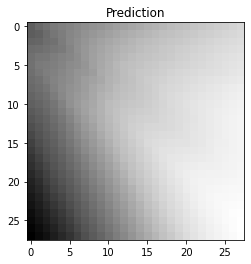

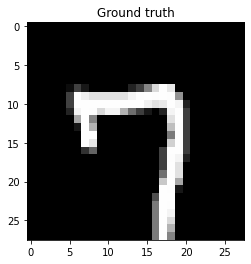

  0%|          | 10/200000 [00:01<42:00:33,  1.32it/s]

Validation loss for the function plotted:                                     0.711


  0%|          | 150/200000 [00:02<51:39, 64.48it/s]

In [ ]:
run_experiment(config_file=mean_exp_config,
               experiment_name='greyscale_mean_40ctxt',
              google_colab=google_colab)

In [ ]:
experiment_config

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=130, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using mean operation
seed is set


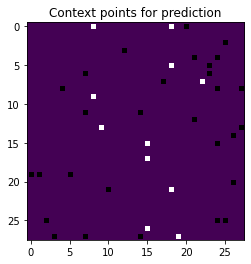

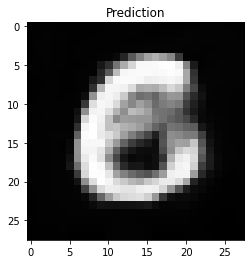

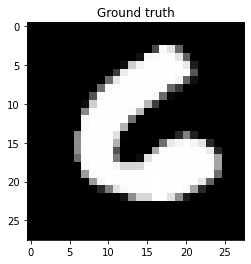

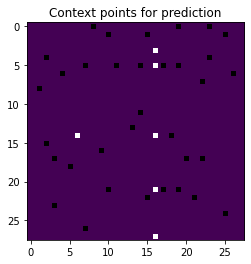

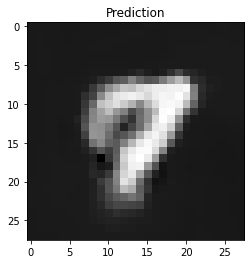

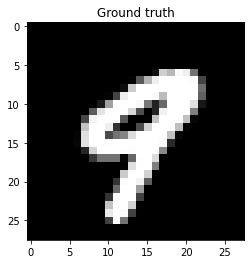

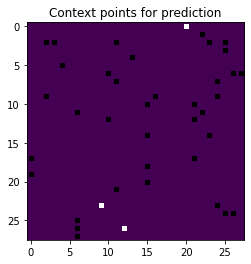

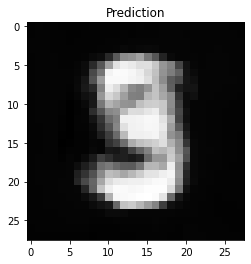

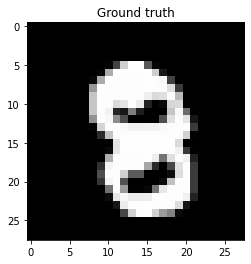

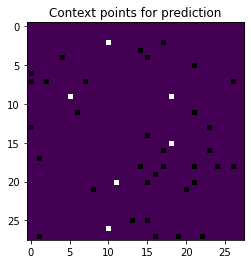

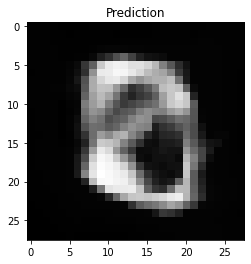

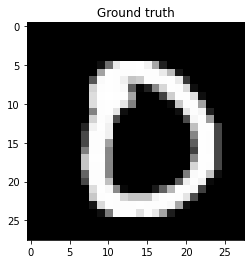

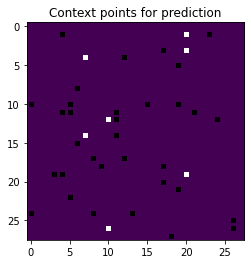

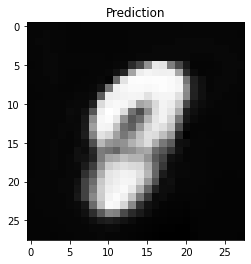

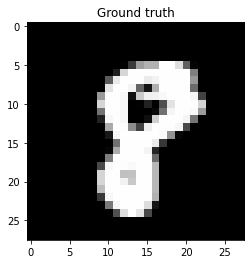

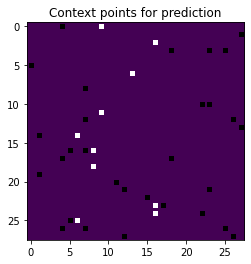

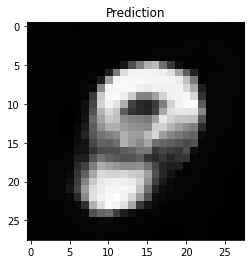

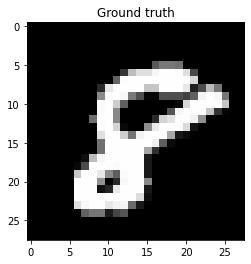

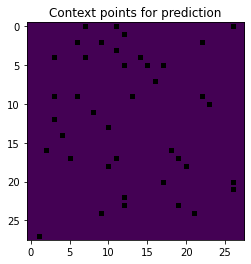

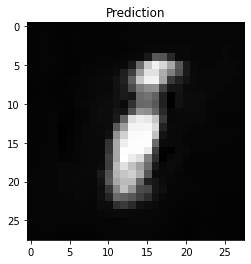

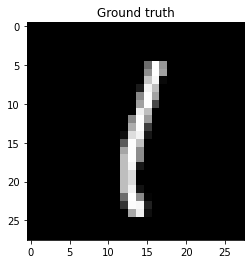

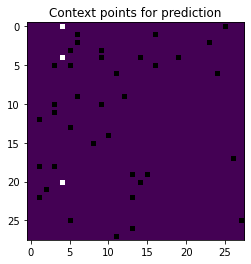

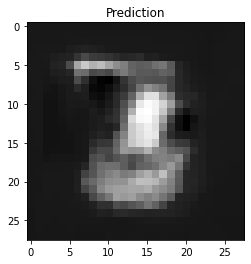

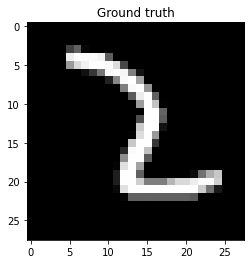

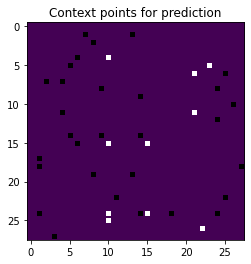

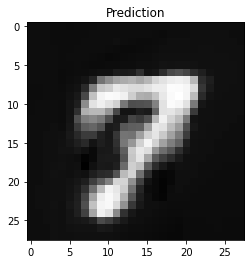

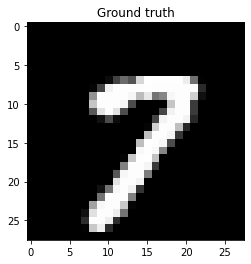

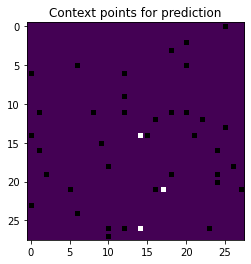

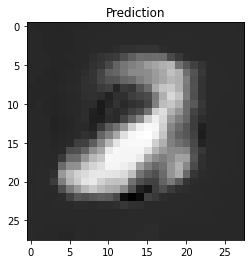

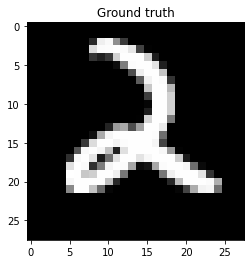

In [ ]:
## Increasing the number of context points 
## Predicting with twice the number of context points
experiment_name = 'greyscale_mean_40ctxt_2020_06_30_12_00'
result_path = 'experiments/results'
with open(os.path.join(result_path, experiment_name,'config_file.json')) as file:
    experiment_config = json.load(file)

experiment_config['cnp_params']['max_contx']=80
CondNeuralProcess = RegressionCNP(**experiment_config['cnp_params'])

trainer = RegressionTrainer(
    data_kwargs=experiment_config['data_kwargs'],
    cnp=CondNeuralProcess,
     **experiment_config['experiment_params'])

if train_on_gpu:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'))
else:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'),map_location=torch.device('cpu'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'),map_location=torch.device('cpu'))

total_mse, task_mses = trainer.run_test(
    encoder_state_dict,
    decoder_state_dict,
    aggregator_state_dict=None,
    batch_size_test=experiment_config['train_kwargs']['batch_size_test'],
    plot_mode=experiment_config['train_kwargs']['plot_mode'])

## Max Experiment 

In [ ]:
max_exp_config = copy(base_config)

In [ ]:
max_exp_config['cnp_params']['aggregation_kwargs']['simple_aggregator_type']='max'


  0%|          | 0/100 [00:00<?, ?it/s]

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=130, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using max operation
Mean training loss at epoch 0 :                         0.666
Mean Validation loss after 0 equals                     0.618



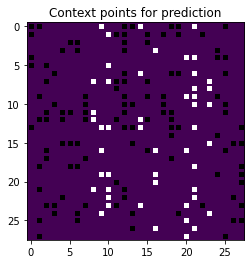

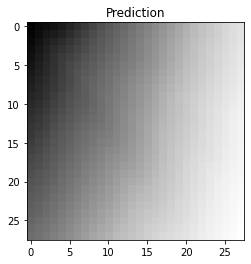

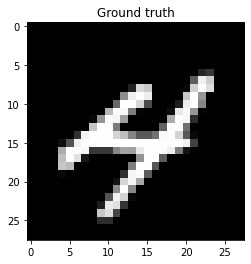

  4%|▍         | 4/100 [00:00<00:36,  2.61it/s]

Validation loss for the function plotted:                                     0.618


100%|██████████| 100/100 [00:04<00:00, 20.75it/s]


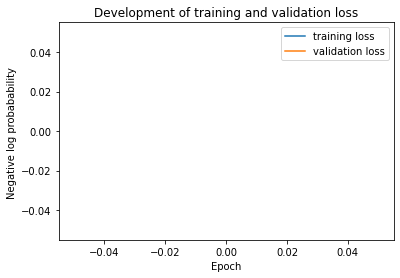

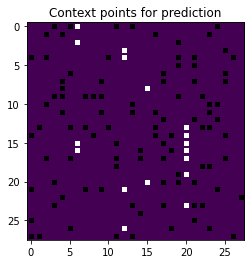

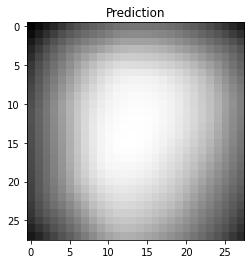

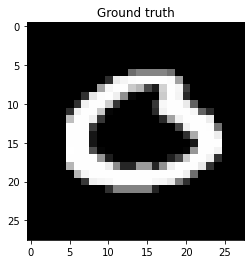

The mean squared error for this experiment is 0.10043326020240784
Creating new directory at experiments/results/greyscale_max_2020_06_29_18_37
Saving encoder
Saving decoder
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config


In [ ]:
run_experiment(config_file=max_exp_config,
               experiment_name='greyscale_max',
              google_colab=google_colab)

##  Sum Experiment 

In [ ]:
sum_exp_config = copy(base_config)

In [ ]:
sum_exp_config['cnp_params']['aggregation_kwargs']['simple_aggregator_type']='sum'

  0%|          | 0/100 [00:00<?, ?it/s]

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=130, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using sum operation
Mean training loss at epoch 0 :                         0.656
Mean Validation loss after 0 equals                     0.623



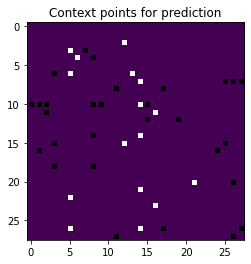

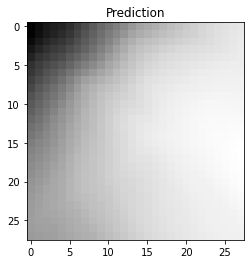

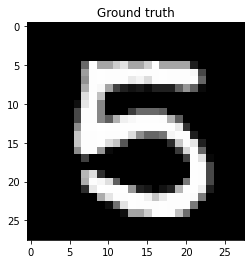

  4%|▍         | 4/100 [00:00<00:38,  2.51it/s]

Validation loss for the function plotted:                                     0.623


100%|██████████| 100/100 [00:04<00:00, 22.18it/s]


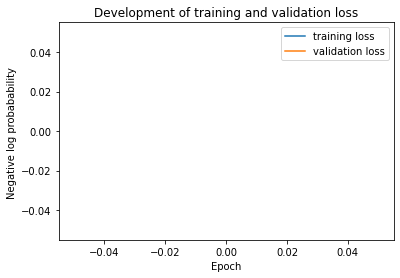

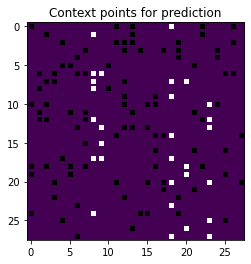

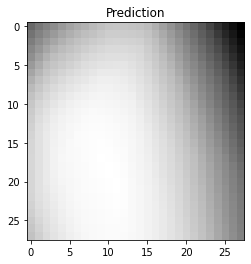

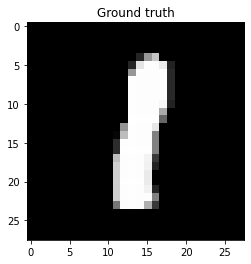

The mean squared error for this experiment is 0.09345554560422897
Creating new directory at experiments/results/greyscale_sum_2020_06_29_18_37
Saving encoder
Saving decoder
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config


In [ ]:
run_experiment(config_file=sum_exp_config,
               experiment_name='greyscale_sum',
              google_colab=google_colab)

  0%|          | 0/20 [00:00<?, ?it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=130, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using mean operation
Mean training loss at epoch 0 :                         0.653
Mean Validation loss after 0 equals                     0.632



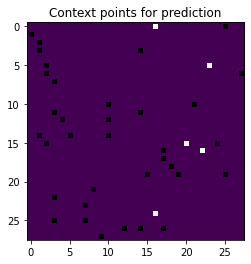

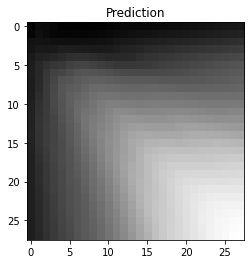

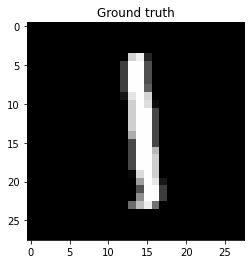

100%|██████████| 20/20 [00:00<00:00, 28.23it/s]

Validation loss for the function plotted:                                     0.636


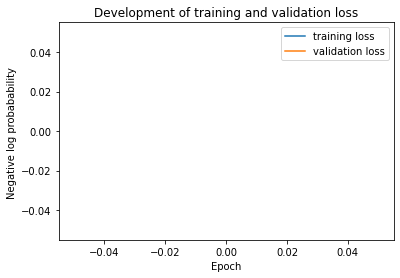

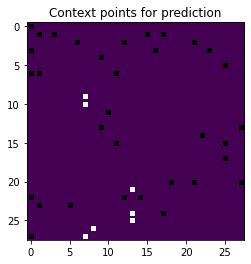

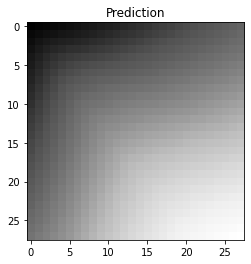

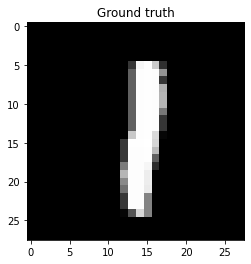

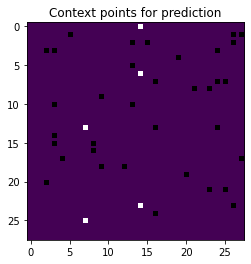

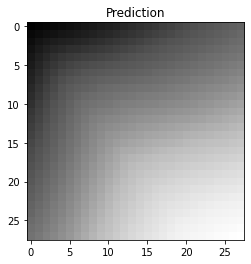

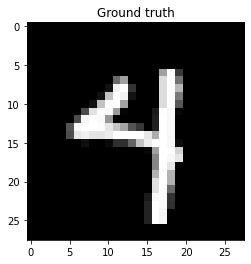

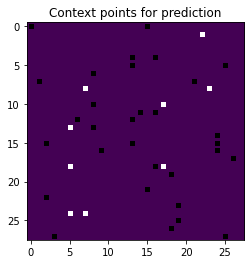

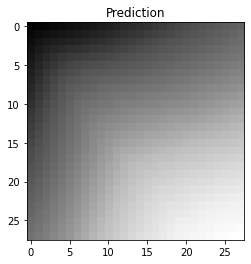

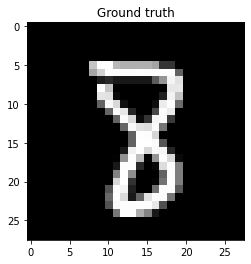

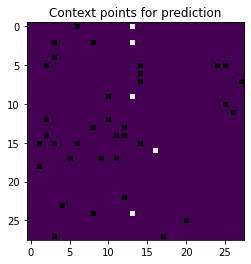

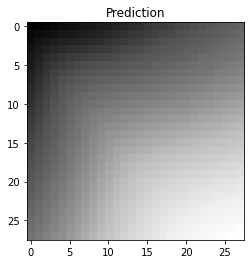

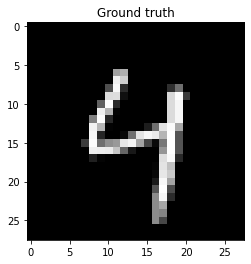

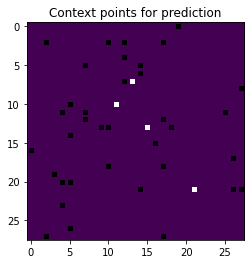

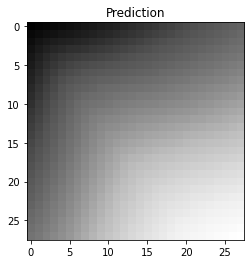

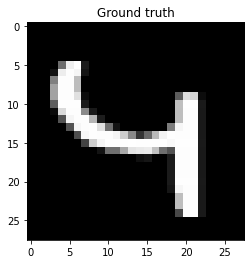

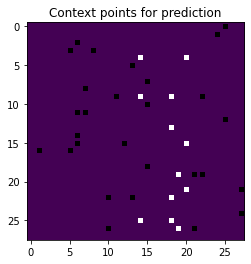

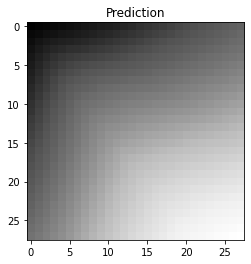

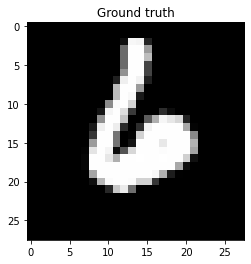

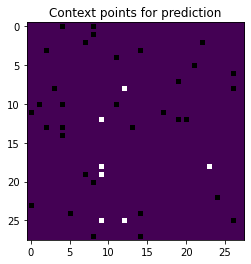

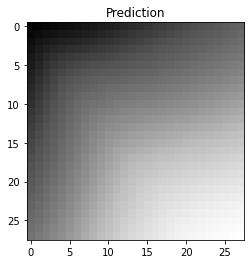

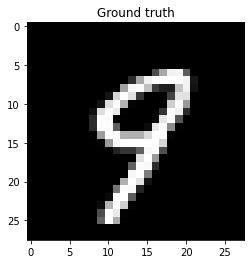

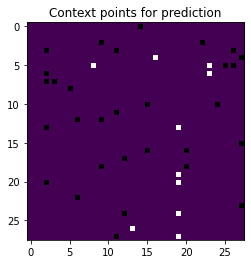

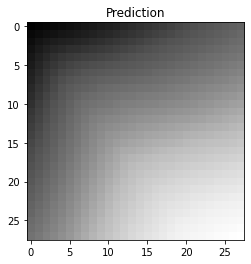

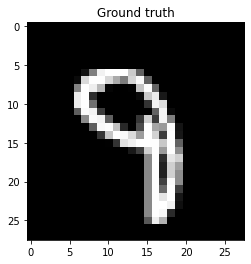

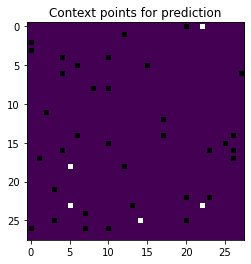

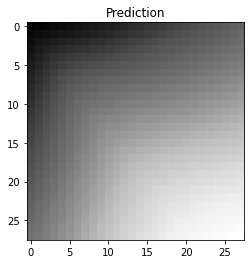

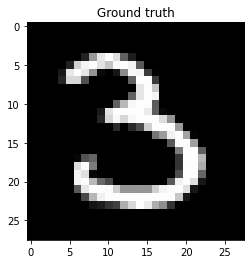

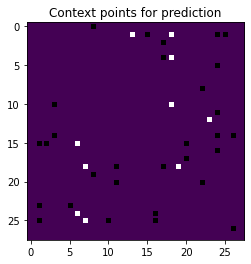

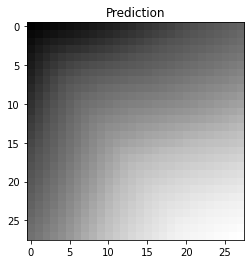

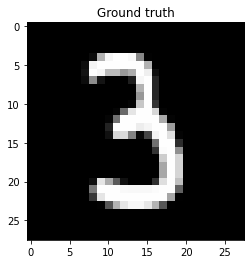

The mean squared error for this experiment is 0.07931920513510704
[0.06665216386318207, 0.07449613511562347, 0.08072985708713531, 0.04543660581111908, 0.09572818875312805, 0.11102250218391418, 0.06996187567710876, 0.07169210910797119, 0.09184367954730988, 0.0856289342045784]


FileExistsError: ignored

In [ ]:
run_experiment(config_file=mean_exp_config,
               experiment_name='greyscale_mean',
              google_colab=google_colab)

##  Attention Model Experiment 

In [ ]:
aggregation_kwargs ={
    "aggregator": "BasicMLPAggregator",
    "insize": 128,
    "num_layers": 2,
    "num_neurons": 64,
    "dimout": 1,
    "dropout": 0.2
    }

In [ ]:
attention_exp_config = copy(base_config)
attention_exp_config['cnp_params']['aggregation_kwargs'] = aggregation_kwargs

  0%|          | 0/100 [00:00<?, ?it/s]

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=130, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
BasicMLPAggregator(
  (_process_input): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
  (softmax): Softmax(dim=1)
)
Mean training loss at epoch 0 :                         0.715
Mean Validation loss after 0 equals    

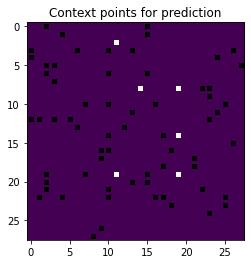

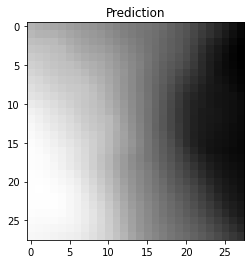

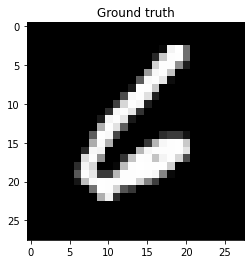

  3%|▎         | 3/100 [00:00<00:35,  2.72it/s]

Validation loss for the function plotted:                                     0.647


100%|██████████| 100/100 [00:05<00:00, 19.66it/s]


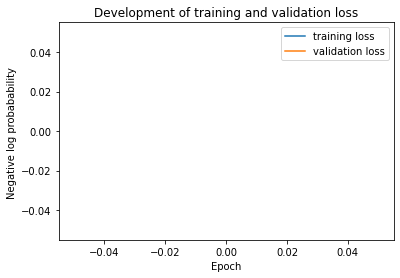

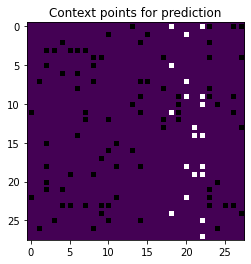

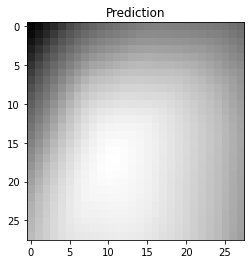

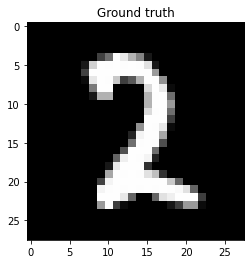

The mean squared error for this experiment is 0.0946713238954544
Creating new directory at experiments/results/1d_gp_attention_2020_06_29_18_38
Saving encoder
Saving decoder
Saving aggregator
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config


In [ ]:
run_experiment(config_file=attention_exp_config,
               experiment_name='1d_gp_attention',
              google_colab=google_colab)

##  Gated attention Model Experiment 

In [ ]:
aggregation_kwargs ={
      "aggregator": "GatedMLPAggregator",
      "insize": 128,
      "num_layers": 2,
      "num_neurons": 64,
      "dimout": 1
    }

In [ ]:
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False
# np.random.seed(0)
# random.seed(0)
# os.environ['PYTHONHASHSEED'] = str(0)

In [ ]:
torch.randperm(5)

tensor([2, 4, 1, 3, 0])